<h1><font color=orange><fontsize: 45pt><center>Application of Model on Month-long Data</center></h1>

This notebook is the second part in using the models to apply on exisiting dataset. In this notebook, I use both the Random Forrest Regressor Model and Decision Tree Regressor Model to work on the dataset, with the dataset extracted from a specific location in a one **month** duration.

The test result of the models will be prediction of the demand data on another week, then use it against the actual demand data from the dataset.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import Geohash
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import math

In [2]:
# Essential FUnctions

def gh_decode(hash):
    lat, lon = Geohash.decode(hash)
    return pd.Series({"latitude":lat, "longitude":lon})

%matplotlib inline

def scatter_plot_compare(actual_test_set, predicted_dataframe):    
    f, axes = plt.subplots(1, 2, figsize=(24, 9))
    axes[0].scatter(predicted_dataframe['time_in_mins'], predicted_dataframe['demand'], color = "black")
    axes[0].set_xlabel("Predicted values of the Response Variable Timestamp in mins")
    axes[0].set_ylabel("Predicted values of the Response Variable Demand")
    axes[1].scatter(actual_test_set['time_in_mins'], actual_test_set['demand'], color = "red")
    axes[1].set_xlabel("True values of the Response Variable Timestamp in mins")
    axes[1].set_ylabel("True values of the Response Variable Demand")
    plt.show()
    
# Model Functions

def RandomForestRegressor_Model(x_train, y_train, X_test):
    RFR_model = RandomForestRegressor(n_estimators = 100, criterion = "mae", n_jobs = -1)
    a = RFR_model.fit(x_train, y_train)
    print(a, "\n")
    predicted_train_set_RFR = RFR_model.predict(x_train)
    
    y_test_predictions_RFR = RFR_model.predict(X_test)
    test_set_predictions_RFR = {'time_in_mins': X_test['time_in_mins'], 'demand': y_test_predictions_RFR}
    predicted_dataframe_RFR = pd.DataFrame(data = test_set_predictions_RFR)
    predicted_dataframe_RFR = predicted_dataframe_RFR[['time_in_mins','demand']]
    
    return predicted_dataframe_RFR

def RandomForestRegressor_Model_complete(x_train, X_test, y_train, y_test):
    RFR_model = RandomForestRegressor(n_estimators = 100, criterion = "mae", n_jobs = -1)
    a = RFR_model.fit(x_train, y_train)
    print(a, "\n")
    predicted_train_set_RFR = RFR_model.predict(x_train)
    
    y_test_predictions_RFR = RFR_model.predict(X_test)
    test_set_predictions_RFR = {'time_in_mins': X_test['time_in_mins'], 'demand': y_test_predictions_RFR}
    predicted_dataframe_RFR = pd.DataFrame(data = test_set_predictions_RFR)
    predicted_dataframe_RFR = predicted_dataframe_RFR[['time_in_mins','demand']]

    actual_test_set = X_test.join(y_test)
    subtract = pd.DataFrame(predicted_dataframe_RFR['demand'].sub(actual_test_set['demand'], axis = 0))
    difference = subtract.reset_index().drop(columns = 'index')
    
    print("Mean Absolute Error     :", mean_absolute_error(actual_test_set['demand'], predicted_dataframe_RFR['demand']))
    print("Mean Squared Error      :", mean_squared_error(actual_test_set['demand'], predicted_dataframe_RFR['demand']))
    print("Root Mean Squared Error :", math.sqrt(mean_squared_error(actual_test_set['demand'], predicted_dataframe_RFR['demand']
                                                                   )), "\n")
    print("Red denotes the Actual Test set while Green denotes the Predicted Test set.")
    f, axes = plt.subplots(1, 2, figsize=(24, 9))
    axes[0].scatter(predicted_dataframe_RFR['time_in_mins'], predicted_dataframe_RFR['demand'], color = "black")
    axes[0].set_xlabel("Predicted values of the Response Variable Timestamp in mins")
    axes[0].set_ylabel("Predicted values of the Response Variable Demand")
    axes[1].scatter(predicted_dataframe_RFR['time_in_mins'], predicted_dataframe_RFR['demand'], color = "green")
    axes[1].scatter(actual_test_set['time_in_mins'], actual_test_set['demand'], color = "red")
    axes[1].set_xlabel("True and Predicted values of the Response Variable Timestamp in mins")
    axes[1].set_ylabel("True and Predicted values of the Response Variable Demand")
    plt.show()
    return pd.DataFrame(predicted_dataframe_RFR)

def DecisionTreeRegressor_Model(x_train, y_train, X_test):
    DTR_Model = DecisionTreeRegressor(max_depth = 5)
    a = DTR_Model.fit(x_train, y_train)
    print(a, "\n")
    preds_train_set_DTR = DTR_Model.predict(x_train)
    
    y_test_predictions_DTR = DTR_Model.predict(X_test)
    test_set_predictions_DTR = {'time_in_mins': X_test['time_in_mins'], 'demand': y_test_predictions_DTR}
    predicted_dataframe_DTR = pd.DataFrame(data = test_set_predictions_DTR)
    predicted_dataframe_DTR = predicted_dataframe_DTR[['time_in_mins','demand']]
    
    return predicted_dataframe_DTR

def DecisionTreeRegressor_Model_complete(x_train, x_test, y_train, y_test):
    DTR_Model = DecisionTreeRegressor(max_depth = 5)
    a = DTR_Model.fit(x_train, y_train)
    print(a, "\n")
    preds_train_set_DTR = DTR_Model.predict(x_train)
    
    y_test_predictions_DTR = DTR_Model.predict(x_test)
    test_set_predictions_DTR = {'time_in_mins': x_test['time_in_mins'], 'demand': y_test_predictions_DTR}
    predicted_dataframe_DTR = pd.DataFrame(data = test_set_predictions_DTR)
    predicted_dataframe_DTR = predicted_dataframe_DTR[['time_in_mins','demand']]
    
    actual_test_set = x_test.join(y_test)
    subtract = pd.DataFrame(predicted_dataframe_DTR['demand'].sub(actual_test_set['demand'], axis = 0))
    difference = subtract.reset_index().drop(columns = 'index')
    
    print("Mean Absolute Error     :", mean_absolute_error(actual_test_set['demand'], predicted_dataframe_DTR['demand']))
    print("Mean Squared Error      :", mean_squared_error(actual_test_set['demand'], predicted_dataframe_DTR['demand']))
    print("Root Mean Squared Error :", math.sqrt(mean_squared_error(actual_test_set['demand'], predicted_dataframe_DTR['demand']
                                                                   )), "\n")  
    print("Red denotes the Actual Test set while Green denotes the Predicted Test set.")
    f, axes = plt.subplots(1, 2, figsize=(24, 9))
    axes[0].scatter(predicted_dataframe_DTR['time_in_mins'], predicted_dataframe_DTR['demand'], color = "black")
    axes[0].set_xlabel("Predicted values of the Response Variable Timestamp in mins")
    axes[0].set_ylabel("Predicted values of the Response Variable Demand")
    axes[1].scatter(predicted_dataframe_DTR['time_in_mins'], predicted_dataframe_DTR['demand'], color = "green")
    axes[1].scatter(actual_test_set['time_in_mins'], actual_test_set['demand'], color = "red")
    axes[1].set_xlabel("True and Predicted values of the Response Variable Timestamp in mins")
    axes[1].set_ylabel("True and Predicted values of the Response Variable Demand")
    plt.show()
    return pd.DataFrame(predicted_dataframe_DTR)

### Importing the Original Dataset

In [3]:
traffic_data = pd.read_csv('Traffic Management/training.csv')

In [4]:
traffic_data_sortdayNtime = pd.DataFrame(traffic_data)
traffic_data_sortdayNtime = traffic_data_sortdayNtime.sort_values(['day', 'timestamp'], ascending = True)

traffic_data_sortdayNtime['hour'] = pd.to_datetime(traffic_data_sortdayNtime['timestamp'], format='%H:%M').dt.hour
traffic_data_sortdayNtime["time_in_mins"] = traffic_data_sortdayNtime["timestamp"].str.split(':').apply(lambda x: int(x[0])
                                                                                                        * 60 + int(x[1]))

<br><br>
# Using Single Week demand to estimate Another Week's demand

### Estimate Week 5 demand for Geohash qp03tx Using Week 2 data

In [5]:
qp03tx = traffic_data_sortdayNtime.loc[(traffic_data_sortdayNtime['geohash6'] == 'qp03tx')]
qp03tx = qp03tx.join(qp03tx['geohash6'].apply(gh_decode))
qp03tx = qp03tx.drop(['geohash6', 'timestamp'], axis = 1)

qp03tx_week_2 = qp03tx.loc[(qp03tx['day'] > 7) & (qp03tx['day'] <= 14)]
qp03tx_week_5 = qp03tx.loc[(qp03tx['day'] > 28) & (qp03tx['day'] <= 35)]

Labelling the dataset, where x1_train and y1_train belong to the train set while x1_test and y1_test belong to the test set.

In [6]:
x1_train = qp03tx_week_2.drop(["demand"], axis = 1)
y1_train = qp03tx_week_2.demand

actual_test_qp03tx = qp03tx_week_5.copy()
x1_test = qp03tx_week_5.drop(["demand"], axis = 1)
y1_test = qp03tx_week_5.demand

Put the train and test sets into the function.

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Mean Absolute Error     : 0.008764421389174392
Mean Squared Error      : 0.00012456925777645984
Root Mean Squared Error : 0.011161059885891654 

Red denotes the Actual Test set while Green denotes the Predicted Test set.


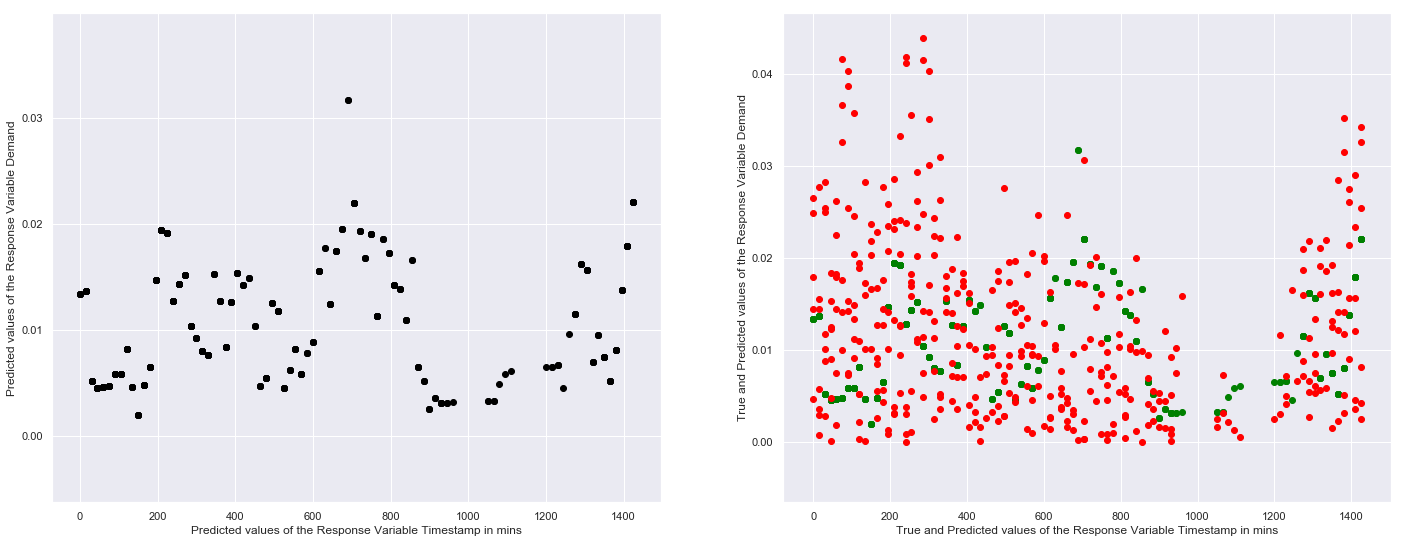

In [7]:
predicted_qp03tx_RFR = RandomForestRegressor_Model_complete(x1_train, x1_test, y1_train, y1_test)

Comparison of the Predicted test set and Actual test set.

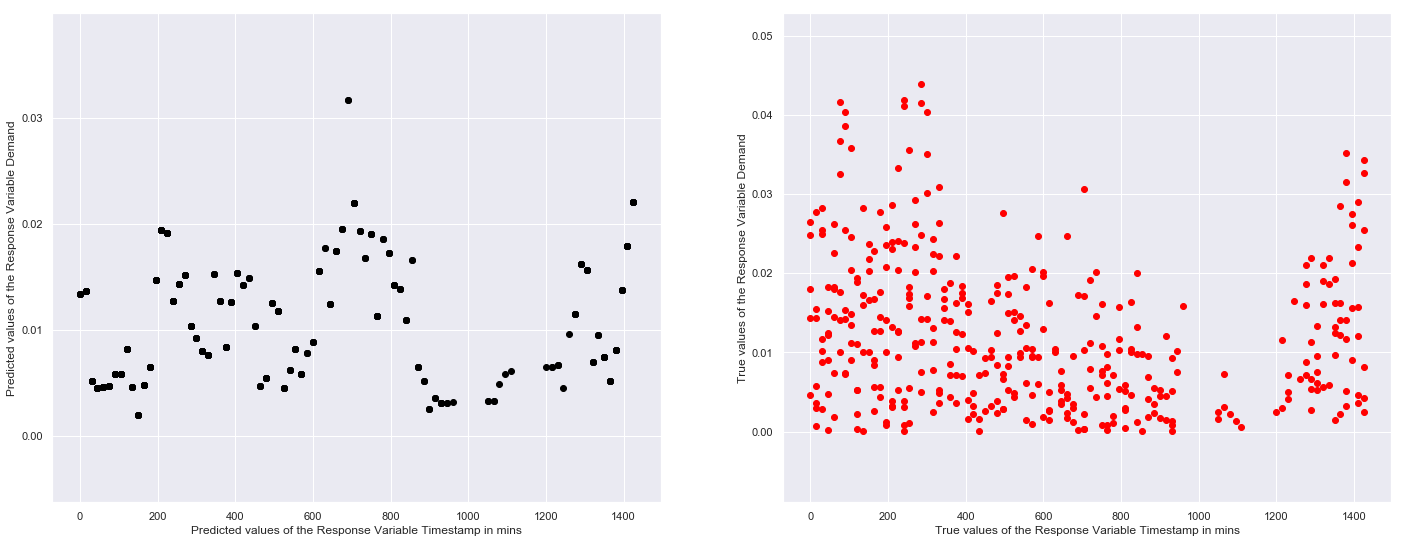

In [8]:
scatter_plot_compare(actual_test_qp03tx, predicted_qp03tx_RFR)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') 

Mean Absolute Error     : 0.008945055949933969
Mean Squared Error      : 0.00012804803359922748
Root Mean Squared Error : 0.011315831105103482 

Red denotes the Actual Test set while Green denotes the Predicted Test set.


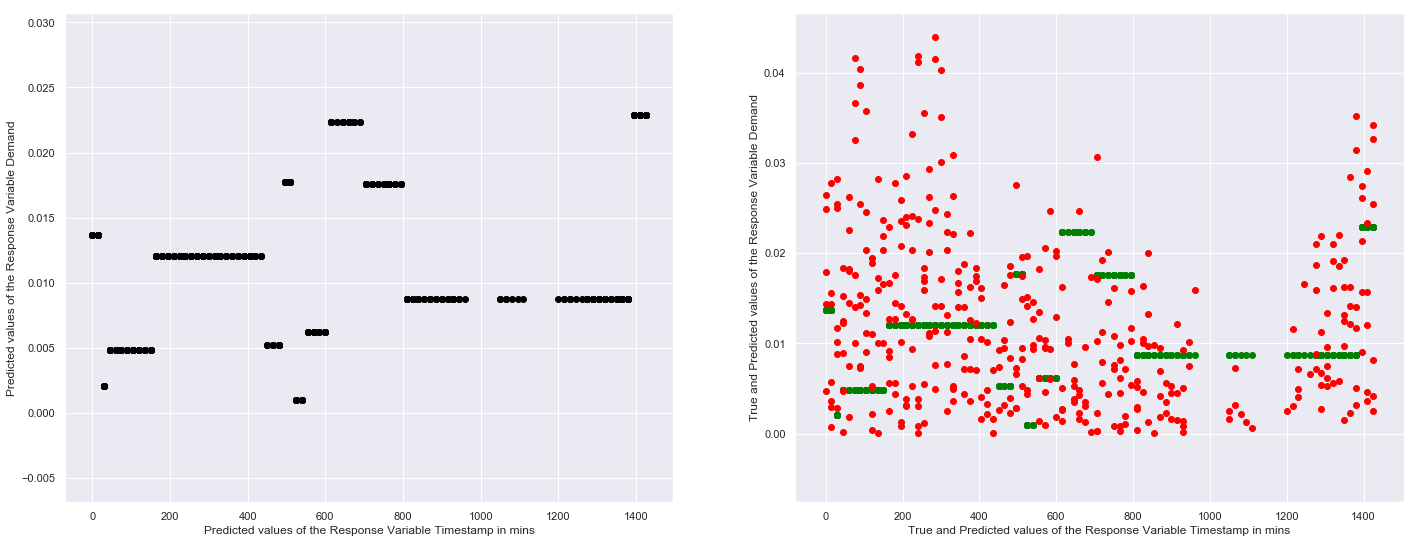

In [9]:
predicted_qp03tx_DTR = DecisionTreeRegressor_Model_complete(x1_train, x1_test, y1_train, y1_test)

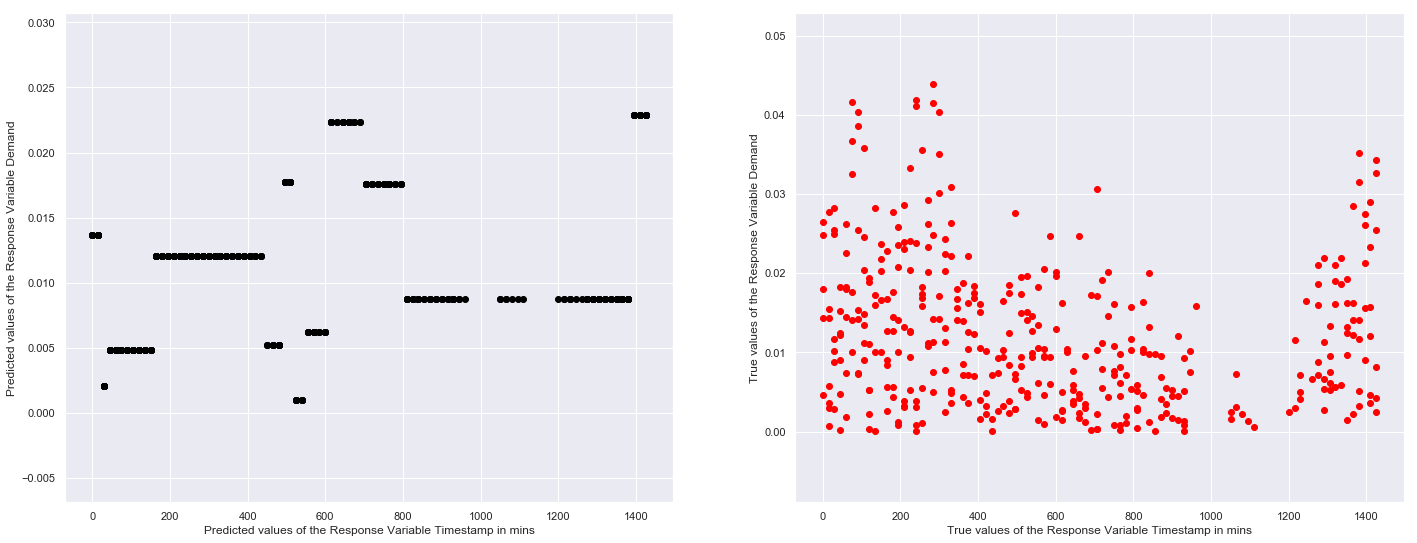

In [10]:
scatter_plot_compare(actual_test_qp03tx, predicted_qp03tx_DTR)

<br><br>
### Estimate Week 6 demand for Geohash qp02zg Using Week 1 data

In [11]:
qp02zg = traffic_data_sortdayNtime.loc[(traffic_data_sortdayNtime['geohash6'] == 'qp02zg')]
qp02zg = qp02zg.join(qp02zg['geohash6'].apply(gh_decode))
qp02zg = qp02zg.drop(['geohash6', 'timestamp'], axis = 1)

qp02zg_week_1 = qp02zg.loc[(qp02zg['day'] > 0) & (qp02zg['day'] <= 7)]
qp02zg_week_6 = qp02zg.loc[(qp02zg['day'] > 36) & (qp02zg['day'] <= 42)]

In [12]:
x2_train = qp02zg_week_1.drop(["demand"], axis = 1)
y2_train = qp02zg_week_1.demand

actual_test_qp02zg = qp02zg_week_6.copy()
x2_test = qp02zg_week_6.drop(["demand"], axis = 1)
y2_test = qp02zg_week_6.demand

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Mean Absolute Error     : 0.03004085728304376
Mean Squared Error      : 0.0018098589582823323
Root Mean Squared Error : 0.042542437145541304 

Red denotes the Actual Test set while Green denotes the Predicted Test set.


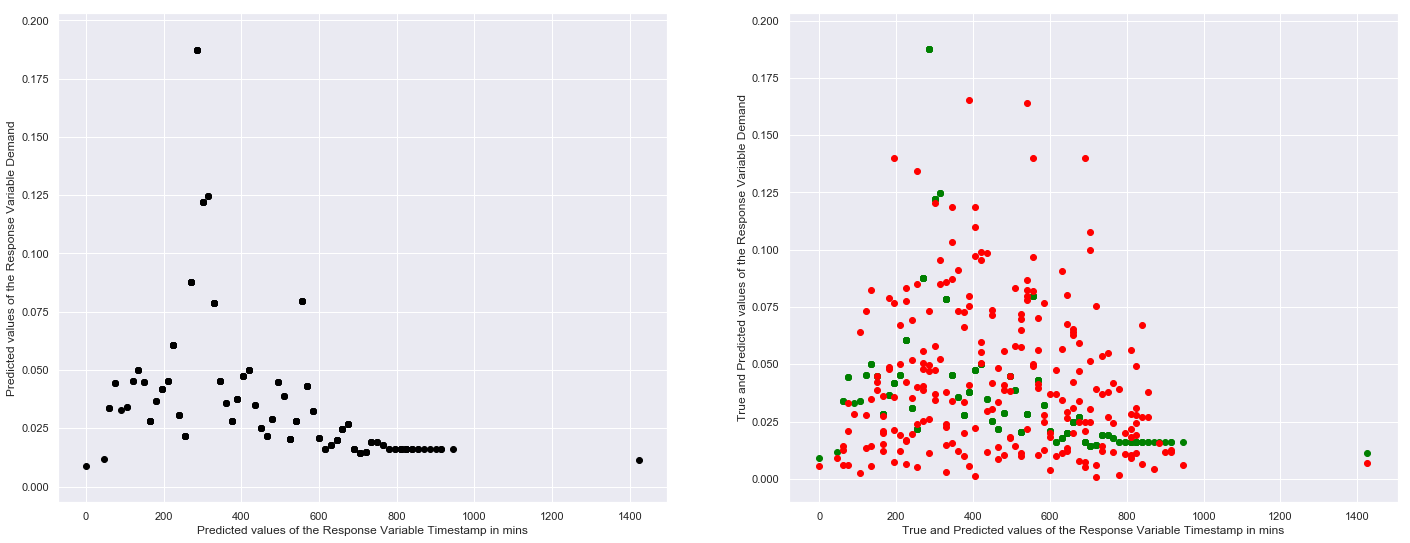

In [13]:
predicted_qp02zg_RFR = RandomForestRegressor_Model_complete(x2_train, x2_test, y2_train, y2_test)

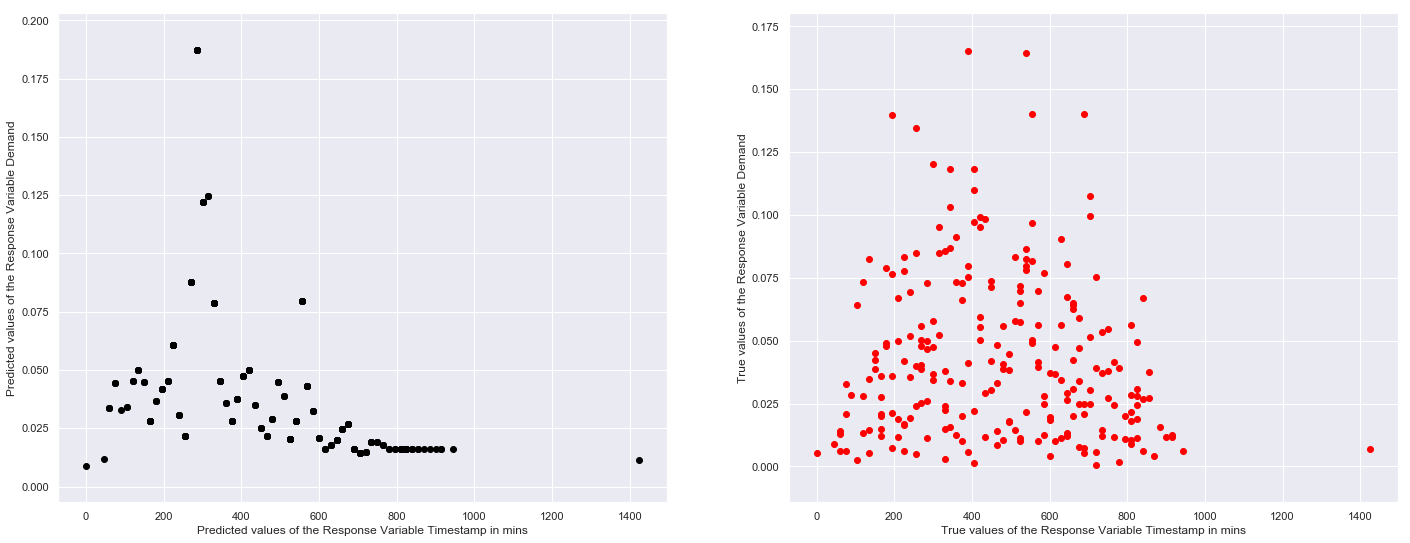

In [14]:
scatter_plot_compare(actual_test_qp02zg, predicted_qp02zg_RFR)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') 

Mean Absolute Error     : 0.025475071464414023
Mean Squared Error      : 0.0011770632679645701
Root Mean Squared Error : 0.03430835565812751 

Red denotes the Actual Test set while Green denotes the Predicted Test set.


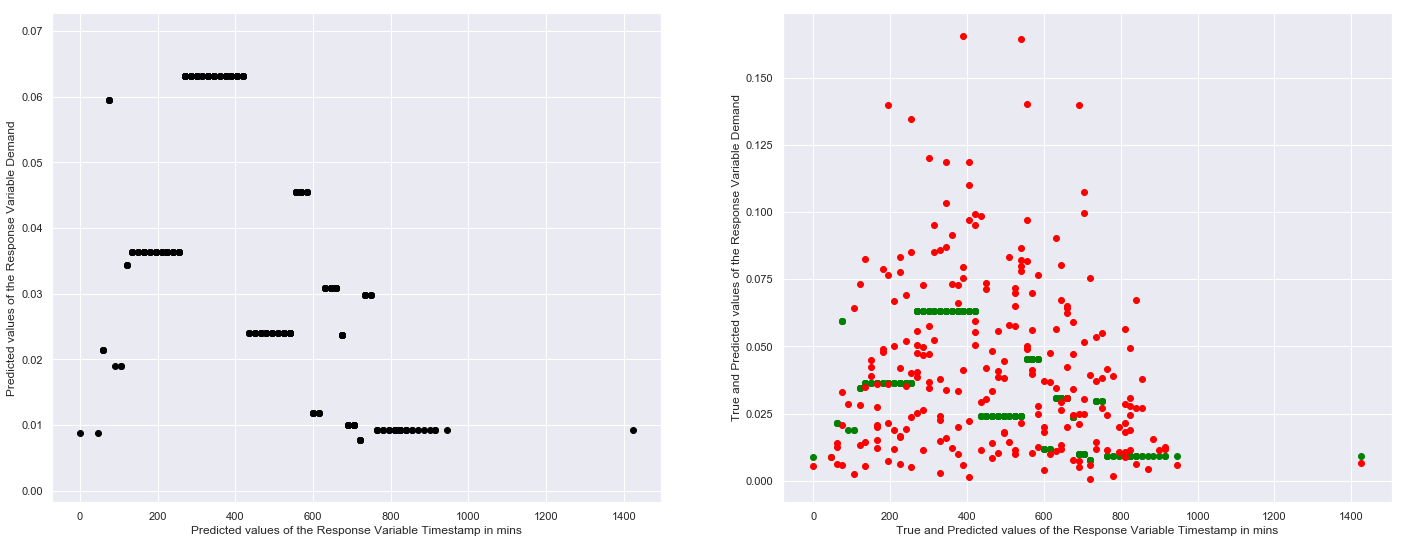

In [15]:
predicted_qp02zg_DTR = DecisionTreeRegressor_Model_complete(x2_train, x2_test, y2_train, y2_test)

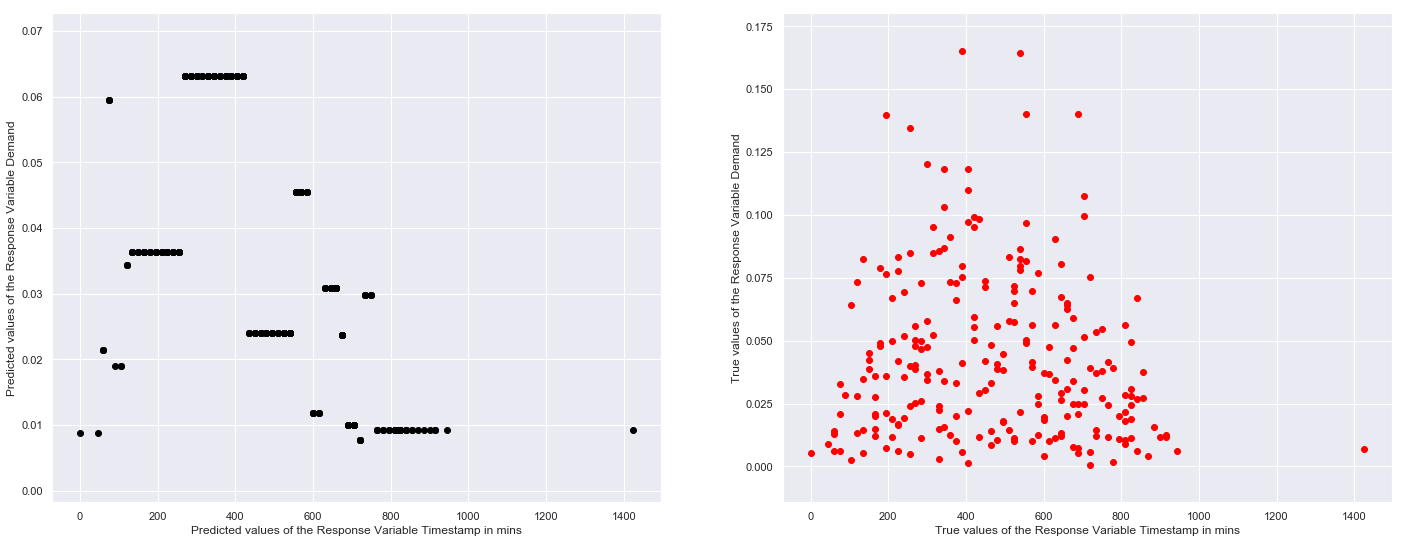

In [16]:
scatter_plot_compare(actual_test_qp02zg, predicted_qp02zg_DTR)

<br><br>
# Using Single Month demand to estimate Another Week's demand

### Estimate Week 7 demand for Geohash qp06pb Using 1st Month data

In [17]:
qp06pb = traffic_data_sortdayNtime.loc[(traffic_data_sortdayNtime['geohash6'] == 'qp06pb')]
qp06pb = qp06pb.join(qp06pb['geohash6'].apply(gh_decode))
qp06pb = qp06pb.drop(['geohash6', 'timestamp'], axis = 1)

qp06pb_1st_mth = qp06pb.loc[(qp06pb['day'] > 0) & (qp06pb['day'] <= 30)]
qp06pb_week_7 = qp06pb.loc[(qp06pb['day'] > 42) & (qp06pb['day'] <= 49)]

In [18]:
x3_train = qp06pb_1st_mth.drop(["demand"], axis = 1)
y3_train = qp06pb_1st_mth.demand

actual_test_qp06pb = qp06pb_week_7.copy()
x3_test = qp06pb_week_7.drop(["demand"], axis = 1)
y3_test = qp06pb_week_7.demand

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Mean Absolute Error     : 0.038859101419510114
Mean Squared Error      : 0.00306764262380662
Root Mean Squared Error : 0.055386303575943936 

Red denotes the Actual Test set while Green denotes the Predicted Test set.


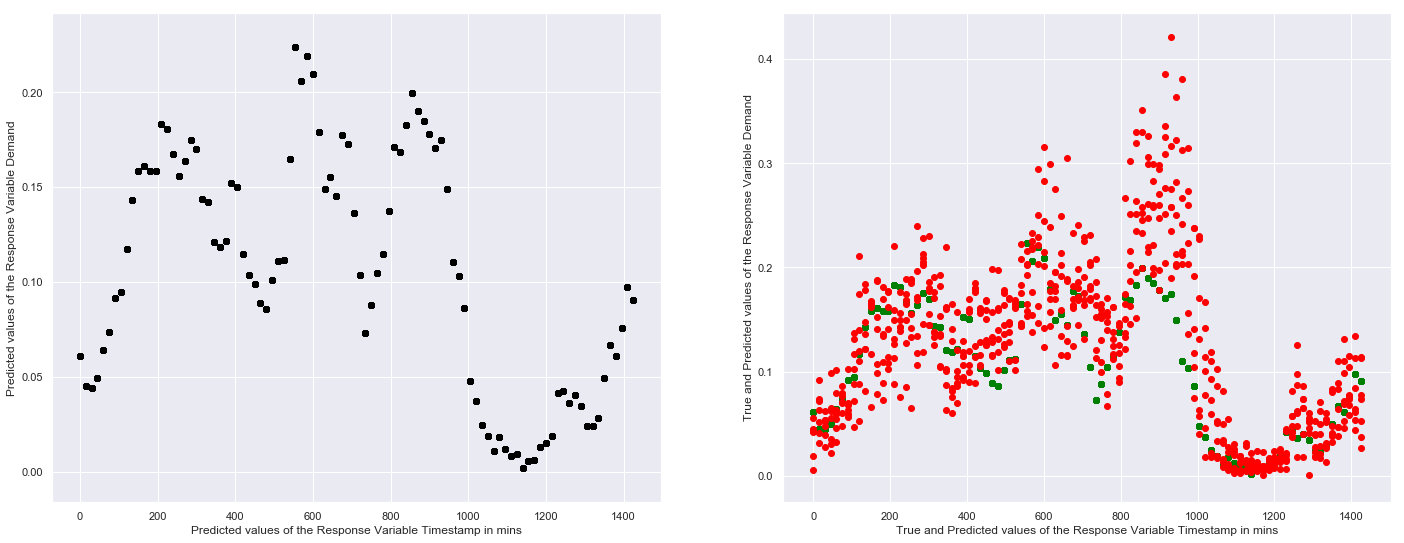

In [19]:
predicted_qp06pb_RFR = RandomForestRegressor_Model_complete(x3_train, x3_test, y3_train, y3_test)

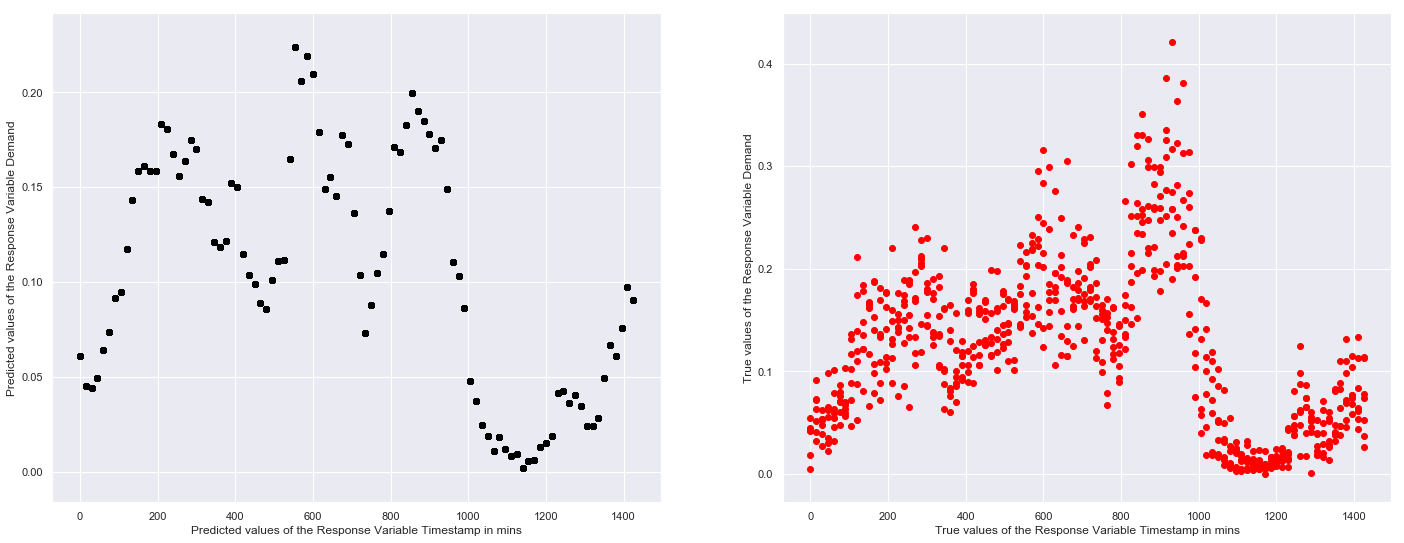

In [20]:
scatter_plot_compare(actual_test_qp06pb, predicted_qp06pb_RFR)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') 

Mean Absolute Error     : 0.03788713117089911
Mean Squared Error      : 0.002849921018290247
Root Mean Squared Error : 0.05338465152354417 

Red denotes the Actual Test set while Green denotes the Predicted Test set.


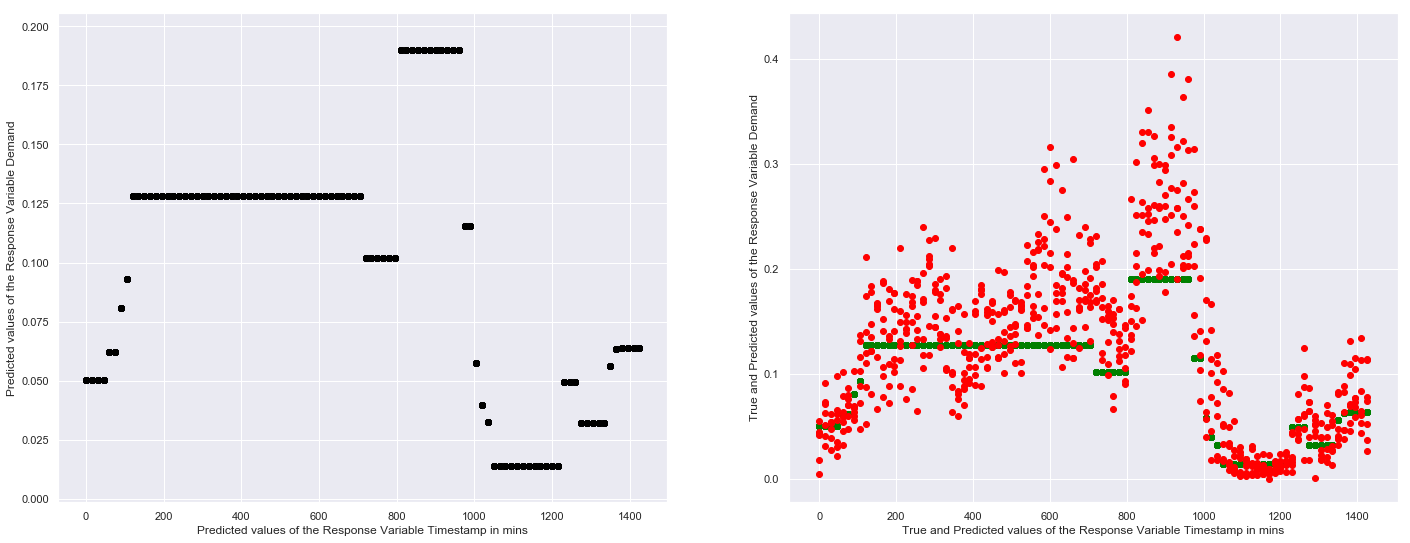

In [21]:
predicted_qp06pb_DTR = DecisionTreeRegressor_Model_complete(x3_train, x3_test, y3_train, y3_test)

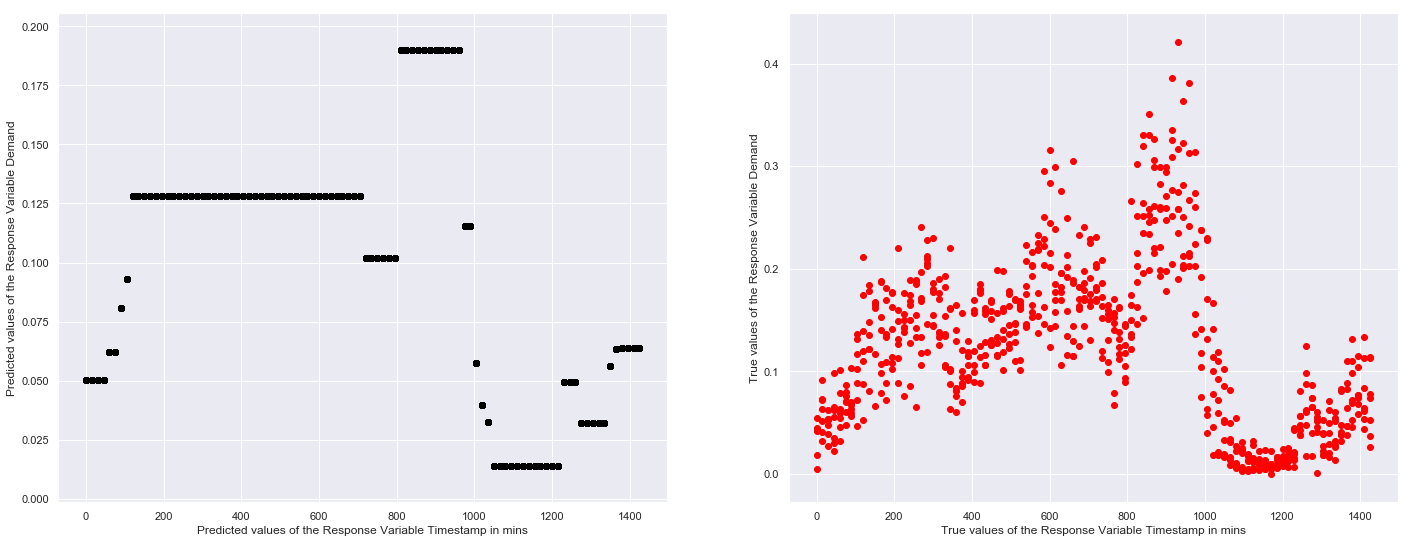

In [22]:
scatter_plot_compare(actual_test_qp06pb, predicted_qp06pb_DTR)

# Conclusion

Having used both the Random Forrest Tree Regressor and Decision Tree Regressor models, the results from RTR on the scatter plot look more realistic as compared to the results from the DTR model. 